In [98]:
import pandas as pd
import glob
import datetime
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from pyhdf import SD
import numpy as np
import pint
from pydoc import help
from pyhdf.SD import *
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
%matplotlib inline

In [3]:
# Set display options to show all rows and columns in dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [99]:
#loop to read in all .cdf files from DOEARM SGP, darmdata contains all the read-in files
darmdata = []
path = "../../data/rong1/climate_fu/Data/DOEARM/sgp/sondewnpn"
file_list = sorted(glob.glob(path + "/*.cdf"))
for file in file_list: 
    ds = xr.open_dataset(file)
    darmdata.append(ds)

In [100]:
len(darmdata)

30648

In [80]:
#loop to check difference between base_time+time_offset[0] & file_name
check = []
bugs=0
for file in darmdata_cleaned:
    
    t_adj = time_adjustment(file)
    t_adj = datetime.datetime(*t_adj)
    
    file_name = file.encoding['source']
    
    pattern = r'[ab]1\.(\d+\.\d+)\.cdf'
    match = re.search(pattern, file_name)
    try:
        ext = match.group(1)
        # Define the format of your date strings
        date_format = "%Y%m%d.%H%M%S"
        # Convert each date string to a datetime object
        ext_dt = datetime.datetime.strptime(ext, date_format)
    except ValueError:
        bugs+=1
    
    tuple_pair = (t_adj, ext_dt)
    
    print(tuple_pair)
    
    check.append(tuple_pair)

(datetime.datetime(2000, 6, 15, 14, 57), datetime.datetime(2000, 6, 15, 14, 57))
(datetime.datetime(2000, 6, 16, 16, 51), datetime.datetime(2000, 6, 16, 16, 51))
(datetime.datetime(2000, 10, 3, 11, 30), datetime.datetime(2000, 10, 3, 11, 30))
(datetime.datetime(2000, 11, 24, 11, 28), datetime.datetime(2000, 11, 24, 11, 28))
(datetime.datetime(2000, 11, 24, 20, 31), datetime.datetime(2000, 11, 24, 20, 31))
(datetime.datetime(2000, 11, 24, 23, 28), datetime.datetime(2000, 11, 24, 23, 28))
(datetime.datetime(2000, 11, 25, 5, 30), datetime.datetime(2000, 11, 25, 5, 30))
(datetime.datetime(2000, 11, 26, 20, 29), datetime.datetime(2000, 11, 26, 20, 29))
(datetime.datetime(2000, 11, 26, 23, 29), datetime.datetime(2000, 11, 26, 23, 29))
(datetime.datetime(2000, 11, 27, 11, 40), datetime.datetime(2000, 11, 27, 11, 40))
(datetime.datetime(2000, 11, 27, 14, 31), datetime.datetime(2000, 11, 27, 14, 31))
(datetime.datetime(2000, 11, 27, 17, 30), datetime.datetime(2000, 11, 27, 17, 30))
(datetime.da

(datetime.datetime(2004, 11, 16, 11, 30), datetime.datetime(2004, 11, 16, 11, 30))
(datetime.datetime(2004, 11, 16, 17, 29), datetime.datetime(2004, 11, 16, 17, 29))
(datetime.datetime(2004, 11, 16, 23, 33), datetime.datetime(2004, 11, 16, 23, 33))
(datetime.datetime(2004, 11, 17, 5, 29), datetime.datetime(2004, 11, 17, 5, 29))
(datetime.datetime(2004, 11, 17, 11, 27), datetime.datetime(2004, 11, 17, 11, 27))
(datetime.datetime(2004, 11, 17, 17, 29), datetime.datetime(2004, 11, 17, 17, 29))
(datetime.datetime(2004, 11, 17, 23, 32), datetime.datetime(2004, 11, 17, 23, 32))
(datetime.datetime(2004, 11, 18, 5, 31), datetime.datetime(2004, 11, 18, 5, 31))
(datetime.datetime(2004, 11, 18, 11, 30), datetime.datetime(2004, 11, 18, 11, 30))
(datetime.datetime(2004, 11, 18, 17, 29), datetime.datetime(2004, 11, 18, 17, 29))
(datetime.datetime(2004, 11, 18, 23, 30), datetime.datetime(2004, 11, 18, 23, 30))
(datetime.datetime(2004, 11, 19, 5, 31), datetime.datetime(2004, 11, 19, 5, 31))
(datetime.

(datetime.datetime(2006, 3, 19, 17, 30), datetime.datetime(2006, 3, 19, 17, 30))
(datetime.datetime(2006, 3, 19, 23, 36), datetime.datetime(2006, 3, 19, 23, 36))
(datetime.datetime(2006, 3, 20, 5, 31), datetime.datetime(2006, 3, 20, 5, 31))
(datetime.datetime(2006, 3, 20, 11, 33), datetime.datetime(2006, 3, 20, 11, 33))
(datetime.datetime(2006, 3, 20, 17, 33), datetime.datetime(2006, 3, 20, 17, 33))
(datetime.datetime(2006, 3, 20, 23, 28), datetime.datetime(2006, 3, 20, 23, 28))
(datetime.datetime(2006, 3, 21, 5, 29), datetime.datetime(2006, 3, 21, 5, 29))
(datetime.datetime(2006, 3, 21, 11, 37), datetime.datetime(2006, 3, 21, 11, 37))
(datetime.datetime(2006, 3, 21, 23, 28), datetime.datetime(2006, 3, 21, 23, 28))
(datetime.datetime(2006, 3, 22, 5, 35), datetime.datetime(2006, 3, 22, 5, 35))
(datetime.datetime(2006, 3, 22, 11, 35), datetime.datetime(2006, 3, 22, 11, 35))
(datetime.datetime(2006, 3, 22, 17, 29), datetime.datetime(2006, 3, 22, 17, 29))
(datetime.datetime(2006, 3, 22, 23

(datetime.datetime(2007, 8, 15, 5, 32), datetime.datetime(2007, 8, 15, 5, 32))
(datetime.datetime(2007, 8, 15, 11, 31), datetime.datetime(2007, 8, 15, 11, 31))
(datetime.datetime(2007, 8, 15, 17, 29), datetime.datetime(2007, 8, 15, 17, 29))
(datetime.datetime(2007, 8, 15, 23, 29), datetime.datetime(2007, 8, 15, 23, 29))
(datetime.datetime(2007, 8, 16, 5, 31), datetime.datetime(2007, 8, 16, 5, 31))
(datetime.datetime(2007, 8, 16, 11, 28), datetime.datetime(2007, 8, 16, 11, 28))
(datetime.datetime(2007, 8, 16, 17, 31), datetime.datetime(2007, 8, 16, 17, 31))
(datetime.datetime(2007, 8, 16, 23, 29), datetime.datetime(2007, 8, 16, 23, 29))
(datetime.datetime(2007, 8, 17, 5, 35), datetime.datetime(2007, 8, 17, 5, 35))
(datetime.datetime(2007, 8, 17, 11, 31), datetime.datetime(2007, 8, 17, 11, 31))
(datetime.datetime(2007, 8, 17, 17, 29), datetime.datetime(2007, 8, 17, 17, 29))
(datetime.datetime(2007, 8, 17, 23, 28), datetime.datetime(2007, 8, 17, 23, 28))
(datetime.datetime(2007, 8, 18, 5,

(datetime.datetime(2008, 9, 23, 17, 29), datetime.datetime(2008, 9, 23, 17, 29))
(datetime.datetime(2008, 9, 23, 23, 30), datetime.datetime(2008, 9, 23, 23, 30))
(datetime.datetime(2008, 9, 24, 5, 44), datetime.datetime(2008, 9, 24, 5, 44))
(datetime.datetime(2008, 9, 24, 11, 28), datetime.datetime(2008, 9, 24, 11, 28))
(datetime.datetime(2008, 9, 24, 17, 28), datetime.datetime(2008, 9, 24, 17, 28))
(datetime.datetime(2008, 9, 24, 23, 28), datetime.datetime(2008, 9, 24, 23, 28))
(datetime.datetime(2008, 9, 25, 5, 40), datetime.datetime(2008, 9, 25, 5, 40))
(datetime.datetime(2008, 9, 25, 11, 30), datetime.datetime(2008, 9, 25, 11, 30))
(datetime.datetime(2008, 9, 25, 17, 28), datetime.datetime(2008, 9, 25, 17, 28))
(datetime.datetime(2008, 9, 25, 23, 28), datetime.datetime(2008, 9, 25, 23, 28))
(datetime.datetime(2008, 9, 26, 5, 42), datetime.datetime(2008, 9, 26, 5, 42))
(datetime.datetime(2008, 9, 26, 11, 29), datetime.datetime(2008, 9, 26, 11, 29))
(datetime.datetime(2008, 9, 26, 17

(datetime.datetime(2009, 12, 2, 17, 29), datetime.datetime(2009, 12, 2, 17, 29))
(datetime.datetime(2009, 12, 2, 23, 27), datetime.datetime(2009, 12, 2, 23, 27))
(datetime.datetime(2009, 12, 3, 5, 30), datetime.datetime(2009, 12, 3, 5, 30))
(datetime.datetime(2009, 12, 3, 11, 24), datetime.datetime(2009, 12, 3, 11, 24))
(datetime.datetime(2009, 12, 3, 17, 30), datetime.datetime(2009, 12, 3, 17, 30))
(datetime.datetime(2009, 12, 3, 23, 30), datetime.datetime(2009, 12, 3, 23, 30))
(datetime.datetime(2009, 12, 4, 5, 33), datetime.datetime(2009, 12, 4, 5, 33))
(datetime.datetime(2009, 12, 4, 11, 27), datetime.datetime(2009, 12, 4, 11, 27))
(datetime.datetime(2009, 12, 4, 17, 35), datetime.datetime(2009, 12, 4, 17, 35))
(datetime.datetime(2009, 12, 4, 23, 27), datetime.datetime(2009, 12, 4, 23, 27))
(datetime.datetime(2009, 12, 5, 5, 47), datetime.datetime(2009, 12, 5, 5, 47))
(datetime.datetime(2009, 12, 5, 11, 28), datetime.datetime(2009, 12, 5, 11, 28))
(datetime.datetime(2009, 12, 5, 17

(datetime.datetime(2011, 4, 24, 5, 30), datetime.datetime(2011, 4, 24, 5, 30))
(datetime.datetime(2011, 4, 24, 8, 31), datetime.datetime(2011, 4, 24, 8, 31))
(datetime.datetime(2011, 4, 24, 11, 30), datetime.datetime(2011, 4, 24, 11, 30))
(datetime.datetime(2011, 4, 24, 14, 26), datetime.datetime(2011, 4, 24, 14, 26))
(datetime.datetime(2011, 4, 24, 17, 28), datetime.datetime(2011, 4, 24, 17, 28))
(datetime.datetime(2011, 4, 24, 20, 27), datetime.datetime(2011, 4, 24, 20, 27))
(datetime.datetime(2011, 4, 24, 23, 29), datetime.datetime(2011, 4, 24, 23, 29))
(datetime.datetime(2011, 4, 25, 2, 30), datetime.datetime(2011, 4, 25, 2, 30))
(datetime.datetime(2011, 4, 25, 5, 34), datetime.datetime(2011, 4, 25, 5, 34))
(datetime.datetime(2011, 4, 25, 8, 23), datetime.datetime(2011, 4, 25, 8, 23))
(datetime.datetime(2011, 4, 25, 11, 30), datetime.datetime(2011, 4, 25, 11, 30))
(datetime.datetime(2011, 4, 25, 14, 27), datetime.datetime(2011, 4, 25, 14, 27))
(datetime.datetime(2011, 4, 25, 17, 27

(datetime.datetime(2012, 10, 14, 17, 25), datetime.datetime(2012, 10, 14, 17, 25))
(datetime.datetime(2012, 10, 14, 23, 34), datetime.datetime(2012, 10, 14, 23, 34))
(datetime.datetime(2012, 10, 15, 5, 29), datetime.datetime(2012, 10, 15, 5, 29))
(datetime.datetime(2012, 10, 15, 11, 30), datetime.datetime(2012, 10, 15, 11, 30))
(datetime.datetime(2012, 10, 15, 17, 27), datetime.datetime(2012, 10, 15, 17, 27))
(datetime.datetime(2012, 10, 15, 23, 31), datetime.datetime(2012, 10, 15, 23, 31))
(datetime.datetime(2012, 10, 16, 5, 29), datetime.datetime(2012, 10, 16, 5, 29))
(datetime.datetime(2012, 10, 16, 11, 31), datetime.datetime(2012, 10, 16, 11, 31))
(datetime.datetime(2012, 10, 16, 17, 30), datetime.datetime(2012, 10, 16, 17, 30))
(datetime.datetime(2012, 10, 16, 23, 47), datetime.datetime(2012, 10, 16, 23, 47))
(datetime.datetime(2012, 10, 17, 5, 26), datetime.datetime(2012, 10, 17, 5, 26))
(datetime.datetime(2012, 10, 17, 11, 30), datetime.datetime(2012, 10, 17, 11, 30))
(datetime.

(datetime.datetime(2014, 7, 17, 11, 30), datetime.datetime(2014, 7, 17, 11, 30))
(datetime.datetime(2014, 7, 17, 17, 29), datetime.datetime(2014, 7, 17, 17, 29))
(datetime.datetime(2014, 7, 17, 23, 33), datetime.datetime(2014, 7, 17, 23, 33))
(datetime.datetime(2014, 7, 18, 5, 29), datetime.datetime(2014, 7, 18, 5, 29))
(datetime.datetime(2014, 7, 18, 11, 32), datetime.datetime(2014, 7, 18, 11, 32))
(datetime.datetime(2014, 7, 18, 17, 30), datetime.datetime(2014, 7, 18, 17, 30))
(datetime.datetime(2014, 7, 18, 23, 30), datetime.datetime(2014, 7, 18, 23, 30))
(datetime.datetime(2014, 7, 19, 5, 31), datetime.datetime(2014, 7, 19, 5, 31))
(datetime.datetime(2014, 7, 19, 11, 28), datetime.datetime(2014, 7, 19, 11, 28))
(datetime.datetime(2014, 7, 19, 17, 29), datetime.datetime(2014, 7, 19, 17, 29))
(datetime.datetime(2014, 7, 19, 23, 30), datetime.datetime(2014, 7, 19, 23, 30))
(datetime.datetime(2014, 7, 20, 5, 28), datetime.datetime(2014, 7, 20, 5, 28))
(datetime.datetime(2014, 7, 20, 11

(datetime.datetime(2016, 2, 23, 17, 25), datetime.datetime(2016, 2, 23, 17, 25))
(datetime.datetime(2016, 2, 23, 23, 27), datetime.datetime(2016, 2, 23, 23, 27))
(datetime.datetime(2016, 2, 24, 5, 31), datetime.datetime(2016, 2, 24, 5, 31))
(datetime.datetime(2016, 2, 24, 11, 31), datetime.datetime(2016, 2, 24, 11, 31))
(datetime.datetime(2016, 2, 24, 17, 28), datetime.datetime(2016, 2, 24, 17, 28))
(datetime.datetime(2016, 2, 24, 23, 29), datetime.datetime(2016, 2, 24, 23, 29))
(datetime.datetime(2016, 2, 25, 5, 31), datetime.datetime(2016, 2, 25, 5, 31))
(datetime.datetime(2016, 2, 25, 11, 31), datetime.datetime(2016, 2, 25, 11, 31))
(datetime.datetime(2016, 2, 25, 17, 26), datetime.datetime(2016, 2, 25, 17, 26))
(datetime.datetime(2016, 2, 25, 23, 30), datetime.datetime(2016, 2, 25, 23, 30))
(datetime.datetime(2016, 2, 26, 5, 27), datetime.datetime(2016, 2, 26, 5, 27))
(datetime.datetime(2016, 2, 26, 11, 26), datetime.datetime(2016, 2, 26, 11, 26))
(datetime.datetime(2016, 2, 26, 17

(datetime.datetime(2017, 12, 5, 17, 28), datetime.datetime(2017, 12, 5, 17, 28))
(datetime.datetime(2017, 12, 5, 23, 30), datetime.datetime(2017, 12, 5, 23, 30))
(datetime.datetime(2017, 12, 6, 5, 31), datetime.datetime(2017, 12, 6, 5, 31))
(datetime.datetime(2017, 12, 6, 11, 31), datetime.datetime(2017, 12, 6, 11, 31))
(datetime.datetime(2017, 12, 6, 17, 27), datetime.datetime(2017, 12, 6, 17, 27))
(datetime.datetime(2017, 12, 6, 23, 31), datetime.datetime(2017, 12, 6, 23, 31))
(datetime.datetime(2017, 12, 7, 5, 32), datetime.datetime(2017, 12, 7, 5, 32))
(datetime.datetime(2017, 12, 7, 11, 30), datetime.datetime(2017, 12, 7, 11, 30))
(datetime.datetime(2017, 12, 7, 17, 29), datetime.datetime(2017, 12, 7, 17, 29))
(datetime.datetime(2017, 12, 7, 23, 29), datetime.datetime(2017, 12, 7, 23, 29))
(datetime.datetime(2017, 12, 8, 5, 33), datetime.datetime(2017, 12, 8, 5, 33))
(datetime.datetime(2017, 12, 8, 11, 30), datetime.datetime(2017, 12, 8, 11, 30))
(datetime.datetime(2017, 12, 8, 17

(datetime.datetime(2019, 6, 20, 8, 36), datetime.datetime(2019, 6, 20, 8, 36))
(datetime.datetime(2019, 6, 20, 11, 29), datetime.datetime(2019, 6, 20, 11, 29))
(datetime.datetime(2019, 6, 20, 14, 28), datetime.datetime(2019, 6, 20, 14, 28))
(datetime.datetime(2019, 6, 20, 17, 29), datetime.datetime(2019, 6, 20, 17, 29))
(datetime.datetime(2019, 6, 20, 20, 29), datetime.datetime(2019, 6, 20, 20, 29))
(datetime.datetime(2019, 6, 20, 23, 28), datetime.datetime(2019, 6, 20, 23, 28))
(datetime.datetime(2019, 6, 21, 2, 29), datetime.datetime(2019, 6, 21, 2, 29))
(datetime.datetime(2019, 6, 21, 5, 37), datetime.datetime(2019, 6, 21, 5, 37))
(datetime.datetime(2019, 6, 21, 8, 35), datetime.datetime(2019, 6, 21, 8, 35))
(datetime.datetime(2019, 6, 21, 11, 29), datetime.datetime(2019, 6, 21, 11, 29))
(datetime.datetime(2019, 6, 21, 14, 29), datetime.datetime(2019, 6, 21, 14, 29))
(datetime.datetime(2019, 6, 21, 17, 32), datetime.datetime(2019, 6, 21, 17, 32))
(datetime.datetime(2019, 6, 21, 20, 

In [101]:
for file in darmdata_cleaned:
    pres = file.variables["pres"].data

30517

In [118]:
pdup = darmdata_cleaned[0].variables['tdry'].data
print(len(pdup), len(set(pdup)))

3081 883


In [120]:
from scipy.interpolate import CubicSpline

# Sample data (replace with your loaded data)
pressure = [1000, 900, 800, 700, 600, 500]
temperature = [25, 20, 15, 10, 5, 0]

# Sort the pressure and corresponding temperature values in ascending order
sorted_indices = np.argsort(pressure)
pressure = np.array(pressure)[sorted_indices]
temperature = np.array(temperature)[sorted_indices]

# Define the desired pressure levels for interpolation
desired_pressure_levels = [950, 850, 750, 650]

# Perform interpolation
cs = CubicSpline(pressure, temperature)
interpolated_temperature = cs(desired_pressure_levels)

# The interpolated_temperature array now contains temperature values at the desired pressure levels.
print(interpolated_temperature)

[22.5 17.5 12.5  7.5]


In [82]:
df = pd.DataFrame(check, columns=['bt_to','file_name'])

In [96]:
# Check if values in the first and second rows are equal
equal=0
for index, row in df.iterrows():
    if row[0] == row[1]:
        equal+=1

In [95]:
df.loc[4149]

bt_to        1994-04-30 20:31:00
file_name    2003-10-12 23:29:00
Name: 4149, dtype: object

In [97]:
equal

30514

In [60]:
file_name_dates = []
for f in file_names:
    pattern = r'[ab]1\.(\d+\.\d+)\.cdf'
    match = re.search(pattern, f)
    if match:
        extracted_part = match.group(1)
        print(extracted_part)
        file_name_dates.append(extracted_part)

20000615.145700
20000616.165100
20001003.113000
20001124.112800
20001124.203100
20001124.232800
20001125.053000
20001126.202900
20001126.232900
20001127.114000
20001127.143100
20001127.173000
20001127.203100
20001128.002900
20001128.033000
20001128.054200
20001128.082800
20001128.112700
20001128.173100
20001128.203100
20001128.232800
20001129.023000
20001129.052900
20001129.083200
20001129.113000
20001129.142900
20001129.173000
20001129.202900
20001129.233000
20001130.023000
20001130.052700
20001130.082800
20001130.113000
20001130.143000
20001130.173000
20001130.202900
20001130.232700
20001201.022900
20001201.052700
20001201.083000
20001201.113000
20001201.143000
20001201.173100
20001201.203100
20001202.002900
20001202.023500
20001202.053000
20001202.082900
20001202.112900
20001202.142900
20001202.172900
20001202.202900
20001202.232900
20001203.022900
20001203.052900
20001203.082700
20001203.112700
20001203.142900
20001203.172800
20001203.202900
20001203.232900
20001204.022900
20001204

In [65]:
print(len(file_name_dates)-len(set(file_name_dates)))

3619


In [63]:
seen = {}
duplicates = []

for item in file_name_dates:
    if item in seen:
        if seen[item] == 1:
            duplicates.append(item)
        seen[item] += 1
    else:
        seen[item] = 1

print("Duplicate Values:", duplicates)

Duplicate Values: ['20010401.052900', '20010401.112900', '20010401.232800', '20010402.052900', '20010402.112800', '20010402.203100', '20010402.232800', '20010403.052900', '20010403.112800', '20010403.211300', '20010403.232600', '20010404.052900', '20010404.113000', '20010404.204400', '20010404.232800', '20010405.053000', '20010405.112800', '20010405.203000', '20010405.232900', '20010406.052800', '20010406.113000', '20010406.203400', '20010406.233100', '20010407.053000', '20010407.112900', '20010407.203000', '20010407.233000', '20010408.052700', '20010408.112900', '20010408.202800', '20010408.233000', '20010409.052700', '20010409.112900', '20010409.203000', '20010409.232900', '20010410.112600', '20010410.202800', '20010410.232700', '20010411.053000', '20010411.113100', '20010411.204300', '20010412.053100', '20010412.112800', '20010412.203100', '20010412.233000', '20010413.053000', '20010413.113100', '20010413.202600', '20010413.233900', '20010414.112800', '20010414.203100', '20010414.23

In [67]:
df = pd.DataFrame({'duplicates': duplicates})
df

duplicates
0     20010401.052900
1     20010401.112900
2     20010401.232800
3     20010402.052900
4     20010402.112800
5     20010402.203100
6     20010402.232800
7     20010403.052900
8     20010403.112800
9     20010403.211300
10    20010403.232600
11    20010404.052900
12    20010404.113000
13    20010404.204400
14    20010404.232800
15    20010405.053000
16    20010405.112800
17    20010405.203000
18    20010405.232900
19    20010406.052800
20    20010406.113000
21    20010406.203400
22    20010406.233100
23    20010407.053000
24    20010407.112900
25    20010407.203000
26    20010407.233000
27    20010408.052700
28    20010408.112900
29    20010408.202800
30    20010408.233000
31    20010409.052700
32    20010409.112900
33    20010409.203000
34    20010409.232900
35    20010410.112600
36    20010410.202800
37    20010410.232700
38    20010411.053000
39    20010411.113100
40    20010411.204300
41    20010412.053100
42    20010412.112800
43    20010412.203100
44    20010412.233000
45    20010413.053000
46    20010413.113100
47    20010413.202600
48    20010413.233900
49    20010414.112800
50    20010414.203100
51    20010414.233000
52    20010415.053000
53    20010415.112800
54    20010415.203000
55    20010415.233000
56    20010416.053000
57    20010416.113100
58    20010416.204000
59    20010416.233000
60    20010417.053200
61    20010417.113300
62    20010417.203000
63    20010417.233300
64    20010418.053100
65    20010418.113100
66    20010419.053200
67    20010419.204200
68    20010419.235000
69    20010420.053000
70    20010420.112900
71    20010420.203100
72    20010420.232900
73    20010421.053100
74    20010421.112700
75    20010421.203100
76    20010421.232900
77    20010422.053500
78    20010422.113800
79    20010422.202600
80    20010422.232900
81    20010423.053100
82    20010423.113100
83    20010423.202900
84    20010423.233000
85    20010424.054800
86    20010424.112700
87    20010424.203100
88    20010424.232900
89    20010425.054100
90    20010425.113000
91    20010425.203000
92    20010425.233000
93    20010426.053100
94    20010426.113000
95    20010426.203600
96    20010426.232900
97    20010427.052900
98    20010427.113300
99    20010427.204200
100   20010428.052900
101   20010428.120100
102   20010428.202900
103   20010428.232900
104   20010429.053100
105   20010429.113000
106   20010429.202900
107   20010429.232900
108   20010430.053000
109   20010430.113000
110   20010430.202800
111   20010430.233000
112   20010501.052700
113   20010501.112800
114   20010501.203400
115   20010501.233000
116   20010502.053400
117   20010502.112600
118   20010502.203300
119   20010502.233200
120   20010503.053100
121   20010503.113000
122   20010503.202900
123   20010503.233000
124   20010504.052900
125   20010504.112600
126   20010504.203100
127   20010504.233000
128   20010505.000300
129   20010505.054900
130   20010505.112800
131   20010505.192900
132   20010505.233400
133   20010506.052900
134   20010506.113200
135   20010506.202900
136   20010506.233000
137   20010507.053000
138   20010507.112900
139   20010507.202900
140   20010507.232800
141   20010508.053000
142   20010508.113100
143   20010508.202900
144   20010508.233000
145   20010509.052900
146   20010509.112700
147   20010509.203100
148   20010509.232900
149   20010510.053100
150   20010510.112600
151   20010510.203000
152   20010510.233100
153   20010511.052900
154   20010511.112700
155   20010511.204800
156   20010511.232900
157   20010512.054400
158   20010512.112400
159   20010512.203100
160   20010512.232900
161   20010513.052900
162   20010513.112500
163   20010513.203100
164   20010513.232900
165   20010514.052800
166   20010514.112500
167   20010514.232900
168   20010515.052900
169   20010515.112600
170   20010515.204900
171   20010515.233100
172   20010516.053200
173   20010516.112900
174   20010516.202800
175   20010516.233000
176   20010517.053000
177   20010517.112800
178   20010517.201700
179   20010517.233000
180   20010518.053100
181   2

In [18]:
#loop to remove files that have less than a 50hpa range in pres variable
darmdata_cleaned = []
count_fails = 0
for file in darmdata: 
    pres = file.variables["pres"].data
    first_p = pres[0]
    last_p = pres[-1]
    if first_p - last_p >= 50:
        darmdata_cleaned.append(file)
    else:
        count_fails += 1

In [16]:
#darmdata_utc_times = []
#base_time + time_offset[0]
def time_adjustment(file):
    bt = file.variables["base_time"].data
    t = file.coords["time"].data[0]
    t_off = file.variables["time_offset"].data[0]
    
    bt = pd.Timestamp(bt)
    t_off = pd.Timestamp(t_off)
    
    yr = bt.year
    month = bt.month
    day = bt.day
    
    if bt.hour == 0 and bt.minute == 0 and bt.second == 0:
        hr = t_off.hour
        minute = t_off.minute
        second = t_off.second
    else:
        hr = bt.hour
        minute = bt.minute
        second = bt.second
    
    time_final = (yr, month, day, hr, minute, second)
    #darmdata_utc_times.append(time_final)
    return(time_final)

In [77]:
test= []
for i in darmdata_cleaned:
    test.append(time_adjustment(i))

len(test)

30517

In [19]:
#checking dewpoint time series
dps = []
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data * units.hPa
    tdry = file.variables['tdry'][:].data * units.degC
    dp = file.variables['dp'][:].data * units.degC
    time = time_adjustment(file)
    time = datetime.datetime(*time)
    mp = mpcalc.mixed_parcel(pres, tdry, dp, depth=50 * units.hPa)
    tup = (time, mp[2])
    dps.append(tup)

/data/rong3/annie/anaconda3/envs/annieenv/lib/python3.9/site-packages/metpy/calc/thermo.py:1384: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/data/rong3/annie/anaconda3/envs/annieenv/lib/python3.9/site-packages/metpy/calc/thermo.py:1384: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/data/rong3/annie/anaconda3/envs/annieenv/lib/python3.9/site-packages/metpy/calc/thermo.py:1301: RuntimeWarning: overflow encountered in exp
  return mpconsts.nounit.sat_pressure_0c * np.exp(
/data/rong3/annie/anaconda3/envs/annieenv/lib/python3.9/site-packages/metpy/calc/thermo.py:1301: RuntimeWarning: overflow encountered in multiply
  return mpconsts.nounit.sat_pressure_0c * np.exp(
/data/rong3/annie/anaconda3/envs/annieenv/lib/python3.9/site-packages/metpy/calc/thermo.py:1446: RuntimeWarning: invalid value encountered in true_divide
  return molecular_weight_ratio * p

In [44]:
#create jja dewpoint df 
dpdf = pd.DataFrame(dps, columns=['date','dewpoint'])

#sets index to be date
dpdf = dpdf.set_index("date")

dpdf['dewpoint'] = dpdf['dewpoint'].apply(lambda x: x.magnitude)

#converts date column to Oklahoma time 
dpdf.index = pd.to_datetime(dpdf.index)

dpdf.index = dpdf.index - datetime.timedelta(hours=6)

#adding columns for year,month,day,hour
dpdf['year'] = dpdf.index.year
dpdf['month'] = dpdf.index.month
dpdf['day'] = dpdf.index.day
dpdf['hour'] = dpdf.index.hour

dpdf = dpdf.sort_index()

#drops duplicate rows across dpdf, basically if same time & day and same lcl calculation
dpdf = dpdf.drop_duplicates()

(26899, 5)

In [43]:
type(dpdf["dewpoint"][0])

numpy.float64

In [45]:
#filters dp_ dataframe for hour 11 and plots the average LCL per day
dp_11 = dpdf[dpdf['hour'] == 11]

# Define a function to map month numbers to seasons
def assign_season(month):
    if month in [3,4,5]:
        return 'MMA'
    elif month in [6,7,8]:
        return 'JJA'
    elif month in [9,10,11]:
        return 'SON'
    else:
        return 'DJF'

# Apply the function to create the "season" column
dp_11['season'] = dp_11['month'].apply(assign_season)
dp_11 = dp_11.sort_index()

#season_dps = dp__11.groupby(['year', 'season'])['pressure'].mean()
season_dps = dp_11.groupby(['year', 'season'])['dewpoint'].agg(['mean', 'size']).rename(columns={'mean': 'mean_dp', 'size': 'count_values'})

season_dps = pd.DataFrame(season_dps).reset_index()

avg_dps_jja = season_dps[season_dps['season'] == 'JJA'].reset_index()
avg_dps_mma = season_dps[season_dps['season'] == 'MMA'].reset_index()
avg_dps_son = season_dps[season_dps['season'] == 'SON'].reset_index()
avg_dps_djf = season_dps[season_dps['season'] == 'DJF'].reset_index()

all_seasons = [avg_dps_jja, avg_dps_mma, avg_dps_son, avg_dps_djf]

/tmp/ipykernel_62348/1693838657.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_11['season'] = dp_11['month'].apply(assign_season)


In [46]:
avg_dps_jja

index  year season    mean_dp  count_values
0       3  2001    JJA  16.290191            30
1       6  2002    JJA  17.190909            91
2      10  2003    JJA  14.429139            74
3      14  2004    JJA  16.505298            88
4      18  2005    JJA  17.179528            91
5      22  2006    JJA  15.817511            89
6      26  2007    JJA  18.391327            88
7      30  2008    JJA  17.019636            87
8      34  2009    JJA  15.947156            89
9      38  2010    JJA  18.397788            91
10     42  2011    JJA  15.931080            91
11     46  2012    JJA  14.821355            90
12     50  2013    JJA  16.634284            92
13     54  2014    JJA  17.085206            90
14     58  2015    JJA  17.824637            88
15     62  2016    JJA  18.252450            85
16     66  2017    JJA  17.294644            91
17     70  2018    JJA  18.391027            90
18     74  2019    JJA  18.456205            88

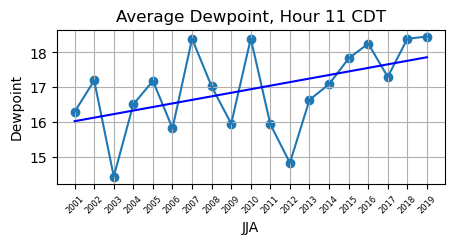

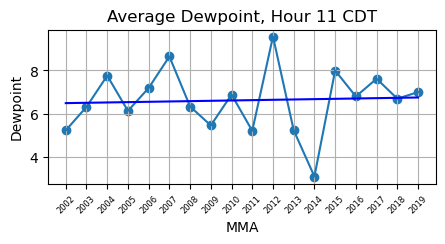

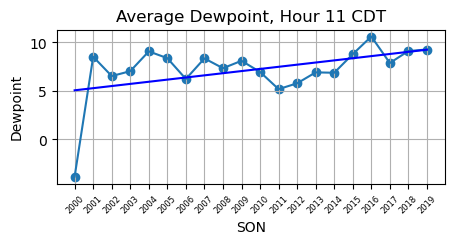

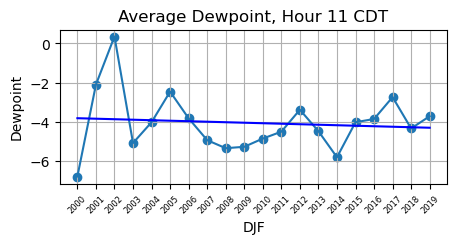

In [53]:
#print plots for seasonal LCL calculations
for df in all_seasons:
    plt.figure(figsize=(5, 2))
    plt.scatter(df['year'], df['mean_dp'])
    xlab = df.loc[0, 'season']
    plt.xlabel(xlab)
    plt.ylabel('Dewpoint')
    plt.title('Average Dewpoint, Hour 11 CDT')
    plt.xticks(df['year'], rotation=45, fontsize=6)

    plt.grid(True)

    # Adding trendline
    x = np.arange(len(df))
    y = df['mean_dp']

    # Fit a linear regression model
    reg = LinearRegression()
    reg.fit(x.reshape(-1, 1), y)

    # Calculate the predicted y-values (trend line)
    y_pred = reg.predict(x.reshape(-1, 1))

    # Plotting the data and trend line
    plt.plot(df['year'], df['mean_dp'], label='Data')
    plt.plot(df['year'], y_pred, color='blue', label='Trend Line')

    plt.show()

In [52]:
# Performing the Mann-Kendall test on full data seasonal LCLs
# shows "decreasing" (ie increasing) significance for all but djf 

seasonal_list = ['JJA', 'MMA', 'SON', 'DJF']
for season in seasonal_list:
    mk_full = dp_11[dp_11['season'] == season]
    mk_full = mk_full["dewpoint"].to_list()
    result = mk.original_test(mk_full)

    # Extract the test statistic and p-value from the result
    test_statistic = result.trend
    p_value = result.p

    # Print the results
    print("Mann-Kendall Test Statistic:", season, test_statistic)
    
    #1-(p-value) represents the probability that the alternative hypothesis is true
    #the alternative hypothesis being that a trend exists
    #the null hypothesis being that no trend exists
    
    print("P-value:", p_value)

Mann-Kendall Test Statistic: JJA increasing
P-value: 6.960543252887419e-11
Mann-Kendall Test Statistic: MMA no trend
P-value: 0.20005383162650725
Mann-Kendall Test Statistic: SON no trend
P-value: 0.6607216257505055
Mann-Kendall Test Statistic: DJF no trend
P-value: 0.5507612360411194


In [ ]:
#loop to remove files that have less than a 50hpa range in pres variable
count_fails = 0
darmdata_cleaned = []
for file in darmdata: 
    pres = file.variables["pres"].data
    first_p = pres[0]
    last_p = pres[-1]
    if first_p - last_p >= 50:
        darmdata_cleaned.append(file)
    else:
        count_fails += 1

In [ ]:
lat_lons = []
for file in darmdata_cleaned:
    lat = file.variables['lat'][:].data
    lon = file.variables['lon'][:].data
    lat_lon_pair = (lat, lon)
    lat_lons.append(lat_lon_pair)

In [ ]:
#specific humidity calculation
spechum_calcs = []
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data[0] * units.hPa
    dp = file.variables['dp'][:].data[0] * units.degC
    i = specific_humidity_from_dewpoint(pres, dp).to('g/kg')
    spechum_calcs.append(i)

In [ ]:
#range of balloon launch times
launch_time_ranges = []
for file in darmdata_cleaned:
    try: 
        start_time = file.variables['time_offset'][:].data[0]
        end_time = file.variables['time_offset'][:].data[-1]
        time_pair = (start_time, end_time)
        launch_time_ranges.append(time_pair)
    except ValueError:
        launch_time_ranges.append(None)

In [1324]:
#collects all time_offset start times and plots the distribution
start_time_hours = []
for i in launch_time_ranges:
    st = i[0]
    st_hour = int(st.astype('datetime64[h]').astype(int) % 24)
    start_time_hours.append(np.mod(st_hour-5,24))

# Count the frequency of each integer
st_frequency = [start_time_hours.count(i) for i in range(24)]

In [1206]:
#collects all base_time hours and plots their distribution
#THIS DOES NOT ACCOUNT FOR DAYLIGHT SAVINGS TIME, THERE WILL BE A DISCREPENCY BETWEEN tz_convert("us/central")
base_times = []
for i in darmdata:
    bt = i.variables['base_time'].data
    base_times.append(bt)

# Extract the hour
base_times_hours=[]
for i in base_times:
    dt = i
    hour = int(dt.astype('datetime64[h]').astype(int) % 24)
    base_times_hours.append(np.mod(hour-5,24))
    
# Count the frequency of each integer
frequency = [base_times_hours.count(i) for i in range(24)]

In [27]:
#compares base_time and time variable for each file
#non_matches length = 17444
#matches length = 13204
matches = []
non_matches = []
for i in darmdata: 
    bt = i.variables["base_time"].data
    t = i.coords["time"].data[0]
    time_tuple = (bt,t)
    if bt != t:
        non_matches.append(time_tuple)
    else:
        matches.append(time_tuple)
        

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:
/tmp/ipykernel_53673/1922100643.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bt != t:

In [189]:
base_time_check = []
for file in darmdata_cleaned:
    bt = file.variables["base_time"].data
    y = np.datetime_as_string(bt, unit='Y').astype(int)
    base_time_check.append(y)

In [211]:
time_check = []
for file in darmdata_cleaned:
    t = file.coords["time"].data[0]
    if t != 0:
        y = np.datetime_as_string(t, unit='Y').astype(int)
        time_check.append(y)

/tmp/ipykernel_53673/2206269877.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if t != 0:


In [524]:
#mixed layer LCL calculation with given dewpoint

mp_lcl_calcs = []
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data * units.hPa
    tdry = file.variables['tdry'][:].data * units.degC
    dp = file.variables['dp'][:].data * units.degC
    base_date = file.variables['base_time'].data
    mp = mpcalc.mixed_parcel(pres, tdry, dp, depth=50 * units.hPa)
    lcl = mpcalc.lcl(mp[0], mp[1], mp[2])
    lcl_tuple = (lcl[0], base_date)
    mp_lcl_calcs.append(lcl_tuple)
    

In [ ]:
#draft, dewpoint from specific humidity
#pres = darmdata[0].variables['pres'][:].data * units.hPa
#tdry = darmdata[0].variables['tdry'][:].data * units.degC


In [ ]:
#draft
#mixed layer LCL calculation with calculated dewpoint from specific humidity

mp_lcl_calcs = []
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data * units.hPa
    tdry = file.variables['tdry'][:].data * units.degC
    #dewpoint calculated from specific humidity
    dp = mpcalc.dewpoint_from_specific_humidity()
    base_date = file.variables['base_time'].data
    mp = mpcalc.mixed_parcel(pres, tdry, dp, depth=50 * units.hPa)
    lcl = mpcalc.lcl(mp[0], mp[1], mp[2])
    lcl_tuple = (lcl[0], base_date)
    mp_lcl_calcs.append(lcl_tuple)
    

In [525]:
#converts mp_lcl_calcs to a dataframe
lcl_df = pd.DataFrame(mp_lcl_calcs, columns=['pressure', 'date'])

#removes commas from date column
#lcl_df['date'] = lcl_df['date'].str.replace(',', ' ')

#removing the "hectopascal" from the pressure column
lcl_df['pressure'] = lcl_df['pressure'].apply(lambda x: re.findall('\d+', str(x))[0] if re.findall('\d+', str(x)) else '')

#removing the hectopascal unit from pressure column
lcl_df['pressure'] = lcl_df['pressure'].str.rstrip('hectopascal').astype(str)

#converts pressure column to integers
lcl_df = lcl_df[lcl_df['pressure'] != '']
lcl_df['pressure'] = lcl_df['pressure'].astype(int)

#sets index to be date
lcl_df = lcl_df.set_index("date")

#converts date column to Oklahoma time 
lcl_df.index = pd.to_datetime(lcl_df.index)

lcl_df.index = lcl_df.index - datetime.timedelta(hours=6)

#adding columns for year,month,day,hour
lcl_df['year'] = lcl_df.index.year
lcl_df['month'] = lcl_df.index.month
lcl_df['day'] = lcl_df.index.day
lcl_df['hour'] = lcl_df.index.hour

In [544]:
#filters lcl_df dataframe for hour 12 and plots the average LCL per day
filtered_df = lcl_df[(lcl_df['hour'] == 11)]

# Define a function to map month numbers to seasons
def assign_season(month):
    if month in [3,4,5]:
        return 'MMA'
    elif month in [6,7,8]:
        return 'JJA'
    elif month in [9,10,11]:
        return 'SON'
    else:
        return 'DJF'

# Apply the function to create the "season" column
filtered_df['season'] = filtered_df['month'].apply(assign_season)

#season_lcls = filtered_df.groupby(['year', 'season'])['pressure'].mean()
season_lcls = filtered_df.groupby(['year', 'season'])['pressure'].agg(['mean', 'size']).rename(columns={'mean': 'mean_pressure', 'size': 'count_values'})
season_lcls = pd.DataFrame(season_lcls).reset_index()

avg_lcls_jja = season_lcls[season_lcls['season'] == 'JJA'].reset_index()
avg_lcls_mma = season_lcls[season_lcls['season'] == 'MMA'].reset_index()
avg_lcls_son = season_lcls[season_lcls['season'] == 'SON'].reset_index()
avg_lcls_djf = season_lcls[season_lcls['season'] == 'DJF'].reset_index()

all_seasons = [avg_lcls_jja, avg_lcls_mma, avg_lcls_son, avg_lcls_djf]


/tmp/ipykernel_53673/3202546042.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['season'] = filtered_df['month'].apply(assign_season)


In [547]:
avg_lcls_jja

index  year season  mean_pressure  count_values
0       3  2001    JJA     786.067797            59
1       6  2002    JJA     834.377778           180
2      10  2003    JJA     810.500000           148
3      14  2004    JJA     846.863636            88
4      18  2005    JJA     819.934066            91
5      22  2006    JJA     793.078652            89
6      26  2007    JJA     846.931818            88
7      30  2008    JJA     821.839080            87
8      34  2009    JJA     812.820225            89
9      38  2010    JJA     822.010989            91
10     42  2011    JJA     762.714286            91
11     46  2012    JJA     778.433333            90

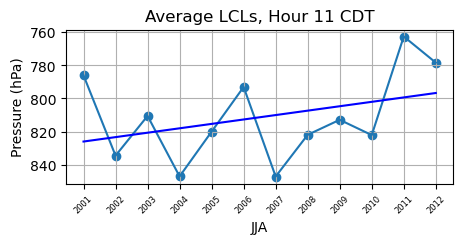

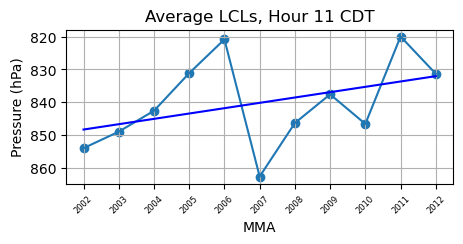

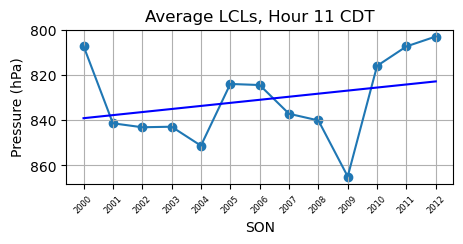

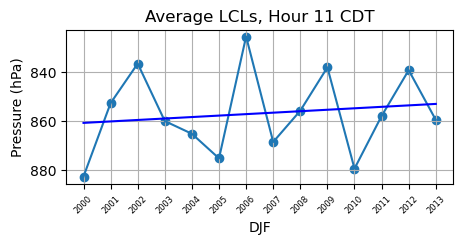

In [545]:
for df in all_seasons:
    plt.figure(figsize=(5, 2))
    plt.scatter(df['year'], df['mean_pressure'])
    xlab = df.loc[0, 'season']
    plt.xlabel(xlab)
    plt.ylabel('Pressure (hPa)')
    plt.title('Average LCLs, Hour 11 CDT')
    plt.xticks(df['year'], rotation=45, fontsize=6)

    plt.gca().invert_yaxis()
    plt.grid(True)

    # Adding trendline
    x = np.arange(len(df))
    y = df['mean_pressure']

    # Fit a linear regression model
    reg = LinearRegression()
    reg.fit(x.reshape(-1, 1), y)

    # Calculate the predicted y-values (trend line)
    y_pred = reg.predict(x.reshape(-1, 1))

    # Plotting the data and trend line
    plt.plot(df['year'], df['mean_pressure'], label='Data')
    plt.plot(df['year'], y_pred, color='blue', label='Trend Line')

    plt.show()

In [ ]:
#functions to use in lcl checks
def convert_pres_to_height(p,hb,tb,pb):
    gas_constant = 8.31432
    lapse_rate = -0.0065
    gravity = 9.80665
    molar_mass = 0.0289644
    k = (-gas_constant*lapse_rate)/(gravity*molar_mass)
    h = hb + (tb/lapse_rate)*((p/pb)**k - 1)
    return h

def convert_c_to_k(temp):
    kelvin = temp + 273.15
    return kelvin

In [ ]:
#verifying LCL calculation using barometric formula
lcl_check = []
for file in darmdata_cleaned:
    
    pres = file.variables['pres'][:].data * units.hPa
    tdry = file.variables['tdry'][:].data * units.degC
    dp = file.variables['dp'][:].data * units.degC
    mp = mpcalc.mixed_parcel(pres, tdry, dp, depth=50 * units.hPa)
    lcl = mpcalc.lcl(mp[0], mp[1], mp[2])
    
    p_lcl = lcl[0].magnitude
    tb = convert_c_to_k(tdry[0].magnitude)
    pb = pres[0].magnitude
    
    h_lcl = convert_pres_to_height(p_lcl,0,tb,pb)
    
    check = (125*(mp[1]-mp[2]).magnitude)/h_lcl
    lcl_check.append(check)

In [414]:
#verifying lcl calculation plots
rounded_list = [round(x * 2) / 2 for x in lcl_check]
frequency_series = pd.Series(rounded_list).value_counts()

# Create a dataframe from the frequency Series
frequency_df = pd.DataFrame({'Value': frequency_series.index, 'Frequency': frequency_series.values})

# Sort the dataframe by the 'Value' column in ascending order
frequency_df.sort_values(by='Value', inplace=True)

# Plot the frequency dataframe
plt.bar(frequency_df['Value'], frequency_df['Frequency'])

plt.xlim(-1,3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Float Values')

plt.show()

ValueError: cannot convert float NaN to integer

In [518]:
#level of free convection calculation (LFC)
#maybe breaking because pprofile takes original pressure array but mixed parcel starts at a different pressure level?
#lfc is where environmental temperature intersects with parcel profile (calculated with the mixed_parcel function)
lfc_calcs = []
counter = 0
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data * units.hPa
    tdry = file.variables['tdry'][:].data * units.degC
    dp = file.variables['dp'][:].data * units.degC
    if not np.any(np.isnan(pres)) and not np.any(np.isnan(tdry)) and not np.any(np.isnan(dp)):
        mp = mpcalc.mixed_parcel(pres, tdry, dp, depth= 50* units.hPa) 
        if not np.isnan(mp[1].squeeze()) and not np.isnan(mp[2].squeeze()):
            print(mp)
            pprofile = mpcalc.parcel_profile(pres.squeeze(), mp[1].squeeze(), mp[2].squeeze()).to('degC')
            i = mpcalc.lfc(pres, tdry, dp, parcel_temperature_profile=pprofile)
            lfc_calcs.append(i)

(<Quantity(973.2999877929688, 'hectopascal')>, <Quantity(25.1624794, 'degree_Celsius')>, <Quantity(12.0450812, 'degree_Celsius')>)


ValueError: This function changed in 1.0--double check that the function is being called properly.
`parcel_profile` given arguments with incorrect units: `pressure` requires "[pressure]" but given "none"
A xarray DataArray or numpy array `x` can be assigned a unit as follows:
    from metpy.units import units
    x = x * units("m/s")
For more information see the Units Tutorial: https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html

In [515]:
#loop shows how each file has duplicate pressure values, which may introduce error in LFC calculation
for i in darmdata_cleaned:
    pres = i.variables['pres'][:].data * units.hPa
    pressure = pres.magnitude
    unique = set(pressure)
    print(len(pressure), len(unique))

3081 2974
3323 2955
3303 2927
2767 2449
2283 2241
2690 2450
2750 2469
3232 2867
2589 2440
3363 2964
3038 2695
2761 2441
3033 2594
2613 2400
3455 3076
3470 2962
2562 2308
2836 2550
2807 2466
2551 2354
2558 2434
2819 2545
2593 2424
2253 2235
3063 2668
2758 2510
2366 2343
2730 2549
2553 2380
2673 2501
2767 2569
2800 2552
2272 2228
2723 2512
2498 2422
3049 2661
2980 2630
2844 2572
1884 1883
3099 2720
2872 2567
2655 2386
2168 2129
1642 1642
1292 1292
2683 2459
1974 1973
1812 1808
1992 1985
2512 2411
2220 2191
2099 2094
2827 2699
2712 2556
2915 2715
2954 2659
2769 2572
2625 2436
2975 2688
2287 2241
2693 2531
2401 2317
1975 1973
2331 2261
2485 2417
2159 2141
2055 2050
2541 2371
2587 2399
2697 2483
2431 2341
1672 1668
2661 2454
2438 2317
2245 2197
2658 2454
2493 2322
2648 2435
2494 2318
2430 2342
2430 2294
1957 1955
2442 2319
2276 2201
2793 2620
2890 2584
1088 1088
2616 2411
2603 2526
2318 2268
2871 2682
2861 2649
2913 2599
3138 2771
2592 2435
2732 2517
2450 2341
2719 2449
2201 2167
1928 1921


7475 7465
6276 6276
6589 6588
7638 7626
5919 5919
10285 9463
6198 6198
6898 6892
6227 6224
5930 5930
2471 2471
4863 4863
6984 6982
5982 5982
6346 6343
6211 6211
6145 6144
5821 5820
8680 8556
4928 4928
5282 5282
6065 6065
5689 5688
5381 5381
5201 5201
5674 5674
5480 5480
4362 4362
5120 5120
4661 4661
4960 4960
5044 5044
5090 5090
5239 5239
5286 5286
4616 4616
6186 6184
5203 5203
5233 5233
5144 5144
4579 4579
5573 5573
4105 4105
5405 5405
5206 5206
5082 5082
4922 4922
4485 4485
4916 4916
5076 5076
5384 5384
5031 5031
5022 5022
4388 4388
4687 4687
4943 4943
5042 5042
4983 4983
5237 5237
4321 4321
4939 4939
4974 4974
5275 5275
4999 4999
5085 5085
5118 5118
4655 4655
5008 5008
5055 5055
6271 6269
4906 4906
5109 5109
5170 5170
5097 5097
5281 5281
5852 5830
371 371
5173 5173
5133 5133
5052 5052
5020 5020
5148 5148
5455 5455
5261 5261
4298 4298
4706 4706
4764 4764
4702 4702
5202 5202
5024 5024
4929 4929
5303 5303
4339 4339
5238 5238
4924 4924
4963 4963
5108 5108
5084 5084
5117 5117
5072 5072
5

In [494]:
p = [1008., 1000., 950., 900., 850., 800., 750., 700., 650., 600.,
     550., 500., 450., 400., 350., 300., 250., 200.,
     175., 150., 125., 100., 80., 70., 60., 50.,
     40., 30., 25., 20.] * units.hPa
# temperature
T = [29.3, 28.1, 23.5, 20.9, 18.4, 15.9, 13.1, 10.1, 6.7, 3.1,
     -0.5, -4.5, -9.0, -14.8, -21.5, -29.7, -40.0, -52.4,
     -59.2, -66.5, -74.1, -78.5, -76.0, -71.6, -66.7, -61.3,
     -56.3, -51.7, -50.7, -47.5] * units.degC
# relative humidity
rh = [.85, .65, .36, .39, .82, .72, .75, .86, .65, .22, .52,
      .66, .64, .20, .05, .75, .76, .45, .25, .48, .76, .88,
      .56, .88, .39, .67, .15, .04, .94, .35] * units.dimensionless
# calculate dewpoint
Td = mpcalc.dewpoint_from_relative_humidity(T, rh)
# computer parcel temperature

print(type(p), type(T[0]), type(Td[0]))
#mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
#pprofile = mpcalc.parcel_profile(pres.squeeze(), T[0].squeeze(), mp[2].squeeze()).to('degC')

<class 'pint.util.Quantity'> <class 'pint.util.Quantity'> <class 'pint.util.Quantity'>


In [459]:
nans = []
for i in dp:
    t = i.magnitude
    if np.isnan(t):
        nans.append(t)

In [429]:
mp_temps = []
for i in mps:
    mp_temp = i[2].magnitude
    mp_temps.append(mp_temp)

In [522]:
# mp temps contains all mixed_parcel calculations, 45 are NANs
# convert the list to a NumPy array to use `np.isnan()`
float_array = np.array(mp_temps)

# Count the number of NaNs using np.isnan() and np.sum()
nan_count = np.sum(np.isnan(float_array))

nan_count

45

In [405]:
p = [1008., 1000., 950., 900., 850., 800., 750., 700., 650., 600.,
     550., 500., 450., 400., 350., 300., 250., 200.,
     175., 150., 125., 100., 80., 70., 60., 50.,
     40., 30., 25., 20.] * units.hPa
# temperature
T = [29.3, 28.1, 23.5, 20.9, 18.4, 15.9, 13.1, 10.1, 6.7, 3.1,
     -0.5, -4.5, -9.0, -14.8, -21.5, -29.7, -40.0, -52.4,
     -59.2, -66.5, -74.1, -78.5, -76.0, -71.6, -66.7, -61.3,
     -56.3, -51.7, -50.7, -47.5] * units.degC
# relative humidity
rh = [.85, .65, .36, .39, .82, .72, .75, .86, .65, .22, .52,
      .66, .64, .20, .05, .75, .76, .45, .25, .48, .76, .88,
      .56, .88, .39, .67, .15, .04, .94, .35] * units.dimensionless
# calculate dewpoint
#Td = dewpoint_from_relative_humidity(T, rh)
# computer parcel temperature
#parcel_profile(p, T[0], Td[0]).to('degC')

print(T[0])

29.3 degree_Celsius


In [409]:
print(mp)

(<Quantity(978.0, 'hectopascal')>, <Quantity(5.15799165, 'degree_Celsius')>, <Quantity(nan, 'degree_Celsius')>)


In [ ]:
#example of how to not do append loops
darmdata = []
path = "../../data/rong1/climate_fu/Data/DOEARM/sgp/sondewnpn"
file_list = sorted(glob.glob(path + "/*.cdf"))
tdry = np.zeros((31000*31000))*np.nan
count = 0
for file in file_list: 
    ds = xr.open_dataset(file)
    tdry_temp = ds.variables['tdry'][:]
    z = len(tdry_temp)
    tdry[count:count + z] = tdry_temp 
    count = count + z

In [ ]:
#DEPRECATED
#surface LCL calculation -- takes as input surface pressure, temperature and dewpoint, assuming here that the first values
sfc_lcl_calcs = []
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data[0] * units.hPa
    tdry = file.variables['tdry'][:].data[0] * units.degC
    dp = file.variables['dp'][:].data[0] * units.degC
    #grabbing 'time' for those that are np.datetime64s
    date = file.coords['time'].data[0]
    #if 'time' is not a datetime, grabbing base_time instead
    base_date = file.variables['base_time'].data
    lcl = mpcalc.lcl(pres, tdry, dp)
    if isinstance(date, np.datetime64):
        lcl_tuple = (lcl[0], date)
        sfc_lcl_calcs.append(lcl_tuple)
    else: 
        lcl_tuple = (lcl[0], base_date)
        sfc_lcl_calcs.append(lcl_tuple)

In [ ]:
#DEPRECATED
#DIURNAL CYCLE 2013-2019 
# Convert the index to a pandas datetime index
lcl_df.index = pd.to_datetime(lcl_df.index)

# Filter for a specific year range
lcl_values_2013_2019 = lcl_df[(lcl_df.index.year >= 2013) & (lcl_df.index.year <= 2019)]
lcl_values_2013_2019 = lcl_values_2013_2019["Pressure"]

lcl_values_1994_2012 = lcl_df[(lcl_df.index.year >= 1994) & (lcl_df.index.year <= 2012)]
lcl_values_1994_2012 = lcl_values_1994_2012["Pressure"].dropna()

#loop to gather hours for bins in numpy digitize
hrs_to_bin_2013_2019 = []

for i in launch_time_ranges:
    start_balloon_time = i[0]
    t = pd.Timestamp(start_balloon_time)
    if 2013 <= t.year <= 2019:
        hrs_to_bin_2013_2019.append(np.mod(t.hour-5,24))

# Define the start and end time for binning
start_time_bin = np.min(hrs_to_bin_2013_2019)
end_time_bin = np.max(hrs_to_bin_2013_2019)

# Generate the bin edges with a spacing of 3
bin_edges_2013_2019 = np.arange(start_time_bin, end_time_bin + 1, 3)

# Use numpy.digitize() to assign each date and time value to a bin
indices_2013_2019 = np.digitize(hrs_to_bin_2013_2019, bin_edges_2013_2019)-1

# Calculate the average pressure for each bin
avg_lcl_values_2013_2019 = [np.nanmean(lcl_values_2013_2019[indices_2013_2019 == i]) for i in range(len(bin_edges_2013_2019))]

#plot 2013-2019 LCL Diurnal Cycle

avg_lcl_value_1994_2012 = np.mean(lcl_values_1994_2012)

plt.plot(bin_edges_2013_2019, avg_lcl_values_2013_2019)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add a title
plt.title("LCL Diurnal Cycle 2013-2019")

# Add axis titles
plt.xlabel("Hour Of Day")
plt.ylabel("Pressure (HPA)")

# Add a single value at (3, 6) on the plot
plt.scatter(19, avg_lcl_value_1994_2012, color='red', marker='o')

# Display the plot
plt.grid(True) 
plt.show()

In [ ]:
# Perform t-test on comparison of LCL Diurnal Cycle 2013-2019 and 1994-2012
t_stat, p_value = stats.ttest_ind(lcl_values_2013_2019[indices_2013_2019==6].values, lcl_values_1994_2012.values)
print(t_stat, p_value)

In [ ]:
#DEPRECATED
#FULL DIURNAL CYCLE OF LCLS 1994-2019
#lcls to bin into 3hr time periods
lcl_values_to_bin = lcl_df["Pressure"]

#loop to gather hours for bins in numpy digitize
hours_to_bin = []
for i in launch_time_ranges:
    start_balloon_time = i[0]
    t = pd.Timestamp(start_balloon_time)
    hours_to_bin.append(np.mod(t.hour-5, 24))
    
# Define the start and end time for binning
start_time = np.min(hours_to_bin)
end_time = np.max(hours_to_bin)

# Generate the bin edges with a spacing of 3
bin_edges = np.arange(start_time, end_time + 1, 3)

# Use numpy.digitize() to assign each date and time value to a bin
indices = np.digitize(hours_to_bin, bin_edges)

# Calculate the average pressure for each bin
avg_pressure_values = [np.mean(lcl_values_to_bin[indices == i]) for i in range(len(bin_edges))]

#plot average diurnal cycle of LCL heights over the full 26 years
plt.plot(bin_edges, avg_pressure_values)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add a title
plt.title("LCL Diurnal Cycle 1994-2019")

# Add axis titles
plt.xlabel("Hour Of Day")
plt.ylabel("Pressure (HPA)")

# Display the plot
plt.grid(True) 
plt.show()

In [ ]:
for i in range(1,1000):
    
    pres = darmdata_cleaned[i].variables['pres'][:].data * units.hPa
    tdry = darmdata_cleaned[i].variables['tdry'][:].data * units.degC
    dp = darmdata_cleaned[i].variables['dp'][:].data * units.degC
    mp = mpcalc.mixed_parcel(pres, tdry, dp, depth=50 * units.hPa)
    lcl = mpcalc.lcl(mp[0], mp[1], mp[2])
    
    p_lcl = lcl[0].magnitude
    tb = convert_c_to_k(tdry[0].magnitude)
    pb = pres[0].magnitude
    
    h_lcl = convert_pres_to_height(p_lcl,0,tb,pb)
    td_dp = 125*(mp[1]-mp[2]).magnitude
    
    check = td_dp/h_lcl
    print(td_dp, h_lcl, check)

In [ ]:
#DEPRECATED: chose base_time or time variable before, now using only base_time in lcl calculation
#mixed layer LCL calculation -- takes as input surface pressure, temperature and dewpoint, assuming here that the first values
mp_lcl_calcs = []
for file in darmdata_cleaned:
    pres = file.variables['pres'][:].data * units.hPa
    tdry = file.variables['tdry'][:].data * units.degC
    dp = file.variables['dp'][:].data * units.degC
    #grabbing 'time' for those that are np.datetime64s
    date = file.coords['time'].data[0]
    #if 'time' is not a datetime, grabbing base_time instead
    base_date = file.variables['base_time'].data
    mp = mpcalc.mixed_parcel(pres, tdry, dp, depth=50 * units.hPa)
    lcl = mpcalc.lcl(mp[0], mp[1], mp[2])
    if isinstance(date, np.datetime64):
        lcl_tuple = (lcl[0], date)
        mp_lcl_calcs.append(lcl_tuple)
    else: 
        lcl_tuple = (lcl[0], base_date)
        mp_lcl_calcs.append(lcl_tuple)
    print(lcl_tuple)